In [1]:
# Import Libraries and Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
nyctaxi = pd.read_parquet('fhvhv_tripdata_2023-12.parquet')

In [3]:
trip_counts = nyctaxi['hvfhs_license_num'].value_counts()

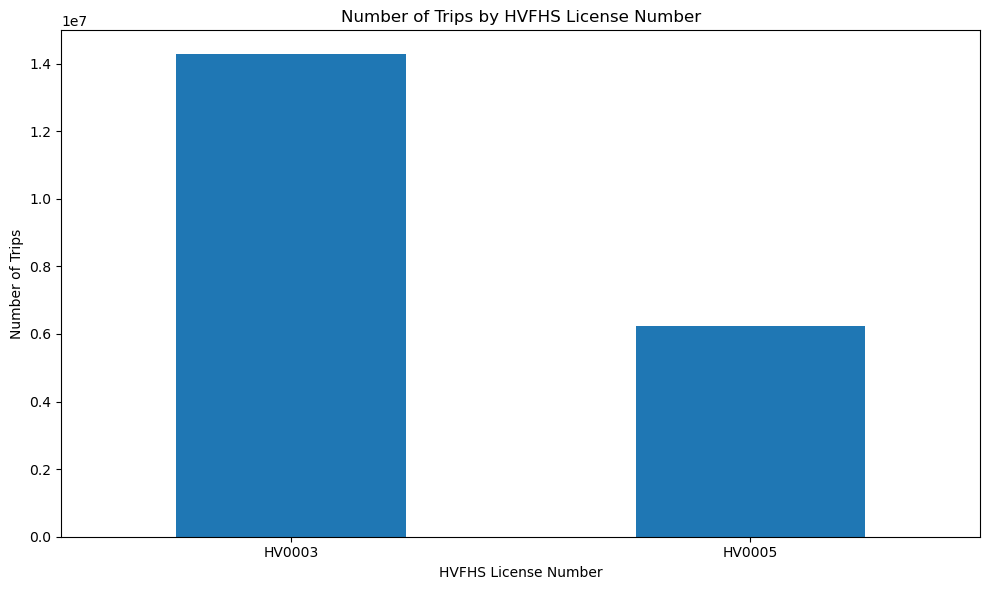

In [4]:
plt.figure(figsize=(10, 6))
trip_counts.plot(kind='bar')
plt.title('Number of Trips by HVFHS License Number')
plt.xlabel('HVFHS License Number')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [5]:
nyctaxi.head(50).to_csv('nyctaxi50.csv', index=False)

In [6]:
nyctaxi_lyft = nyctaxi[nyctaxi['hvfhs_license_num'] == 'HV0005']
nyctaxi_lyft.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
17,HV0005,B03406,None,2023-12-01 00:47:05,NaT,2023-12-01 00:50:08,2023-12-01 01:27:59,256,132,17.227,...,5.24,0.00,2.5,0.0,44.32,N,N,N,N,N
18,HV0005,B03406,None,2023-12-01 00:05:50,NaT,2023-12-01 00:09:21,2023-12-01 00:20:38,40,97,1.934,...,0.96,0.00,0.0,3.0,8.98,N,N,N,N,N
19,HV0005,B03406,None,2023-12-01 00:29:16,NaT,2023-12-01 00:32:32,2023-12-01 00:43:27,148,79,1.313,...,0.98,2.75,0.0,0.0,7.96,N,N,N,N,N
20,HV0005,B03406,None,2023-12-01 00:42:14,NaT,2023-12-01 00:47:13,2023-12-01 01:06:57,107,256,4.059,...,1.83,2.75,0.0,0.0,16.60,N,N,N,N,N
27,HV0005,B03406,None,2023-12-01 00:43:33,NaT,2023-12-01 00:46:08,2023-12-01 00:49:17,129,138,1.436,...,0.95,0.00,2.5,0.0,5.47,N,N,N,N,N


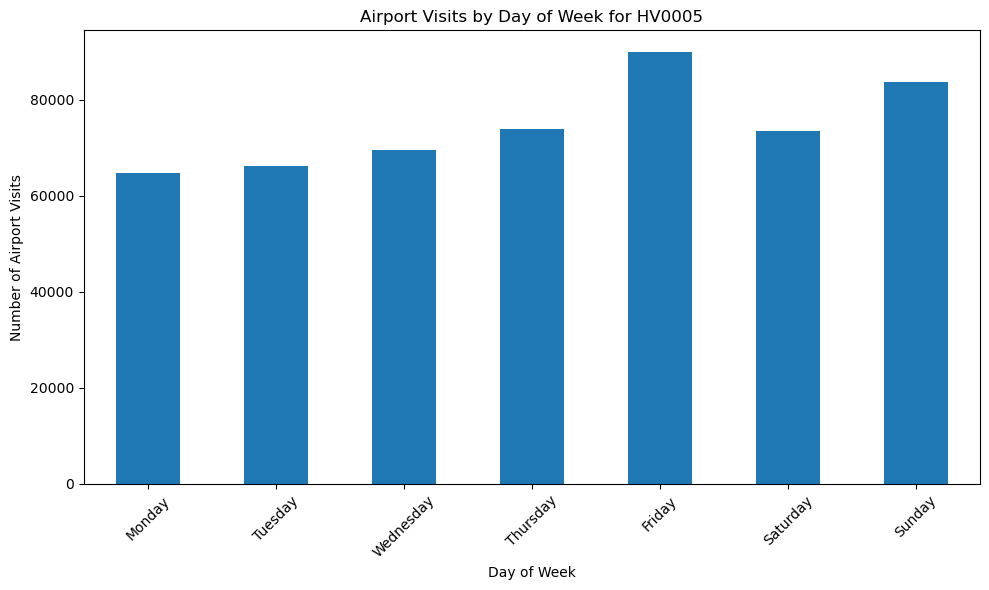

In [7]:
nyctaxi_lyft.loc[:,'airport_visit'] = nyctaxi_lyft['airport_fee'] > 0

nyctaxi_lyft.loc[:,'pickup_datetime'] = pd.to_datetime(nyctaxi_lyft['pickup_datetime'])
nyctaxi_lyft.loc[:,'day_of_week'] = nyctaxi_lyft['pickup_datetime'].dt.day_name()

airport_visits = nyctaxi_lyft.groupby('day_of_week')['airport_visit'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
airport_visits.plot(kind='bar')
plt.title('Airport Visits by Day of Week for HV0005')
plt.xlabel('Day of Week')
plt.ylabel('Number of Airport Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
nyctaxi_lyft.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'airport_visit', 'day_of_week'],
      dtype='object')

In [9]:
nyctaxi_lyft.loc[:,'total_ride_cost'] = (
    nyctaxi_lyft['base_passenger_fare'] + 
    nyctaxi_lyft['tolls'] + 
    nyctaxi_lyft['bcf'] +
    nyctaxi_lyft['sales_tax'] +
    nyctaxi_lyft['congestion_surcharge'] +
    nyctaxi_lyft['airport_fee'] +
    nyctaxi_lyft['tips'] )

avg_cost = nyctaxi_lyft.groupby('hvfhs_license_num')['total_ride_cost'].mean()


In [10]:
nyctaxi_lyft.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,airport_visit,day_of_week,total_ride_cost
17,HV0005,B03406,None,2023-12-01 00:47:05,NaT,2023-12-01 00:50:08,2023-12-01 01:27:59,256,132,17.227,...,0.0,44.32,N,N,N,N,N,True,Friday,65.87
18,HV0005,B03406,None,2023-12-01 00:05:50,NaT,2023-12-01 00:09:21,2023-12-01 00:20:38,40,97,1.934,...,3.0,8.98,N,N,N,N,N,False,Friday,15.73
19,HV0005,B03406,None,2023-12-01 00:29:16,NaT,2023-12-01 00:32:32,2023-12-01 00:43:27,148,79,1.313,...,0.0,7.96,N,N,N,N,N,False,Friday,15.38
20,HV0005,B03406,None,2023-12-01 00:42:14,NaT,2023-12-01 00:47:13,2023-12-01 01:06:57,107,256,4.059,...,0.0,16.60,N,N,N,N,N,False,Friday,25.78
27,HV0005,B03406,None,2023-12-01 00:43:33,NaT,2023-12-01 00:46:08,2023-12-01 00:49:17,129,138,1.436,...,0.0,5.47,N,N,N,N,N,True,Friday,11.99


In [11]:
display(nyctaxi_lyft['day_of_week'].value_counts())

day_of_week
Saturday     1114333
Friday       1108963
Sunday       1074581
Thursday      810312
Wednesday     753471
Tuesday       704483
Monday        676528
Name: count, dtype: int64

In [12]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,22):
        return 'Evening'
    else:
        return 'Late night'
nyctaxi_lyft['pickup_datetime'] = pd.to_datetime(nyctaxi_lyft['pickup_datetime'])
nyctaxi_lyft['dropoff_datetime'] = pd.to_datetime(nyctaxi_lyft['dropoff_datetime'])

nyctaxi_lyft['pickup_hour'] = nyctaxi_lyft['pickup_datetime'].dt.hour
nyctaxi_lyft['dropoff_hour'] = nyctaxi_lyft['dropoff_datetime'].dt.hour

nyctaxi_lyft['pickup_timeday'] = nyctaxi_lyft['pickup_hour'].apply(time_of_day)
nyctaxi_lyft['dropoff_timeday'] = nyctaxi_lyft['dropoff_hour'].apply(time_of_day)

Text(0.5, 0, 'Drop Off Hour')

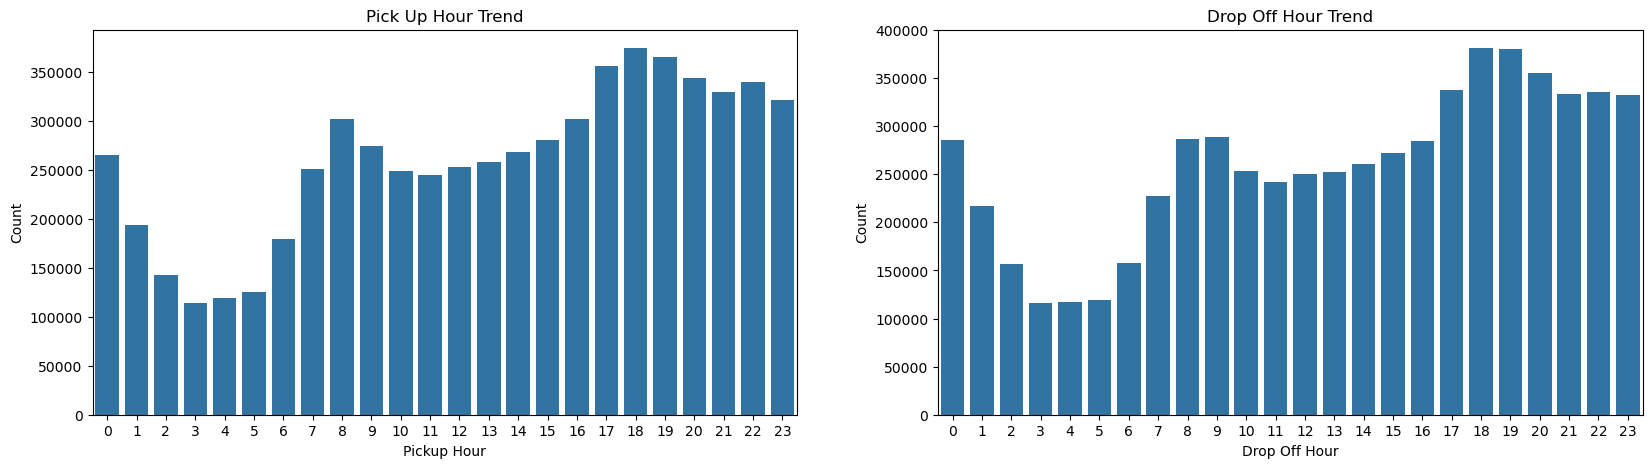

In [13]:
figure, (ax9, ax10) = plt.subplots(ncols=2, figsize=(20,5))

ax9.set_title('Pick Up Hour Trend')
sns.countplot(x="pickup_hour", data=nyctaxi_lyft, ax=ax9)
ax9.set_ylabel('Count')
ax9.set_xlabel('Pickup Hour')

ax10.set_title('Drop Off Hour Trend')
sns.countplot(x="dropoff_hour", data=nyctaxi_lyft, ax=ax10)
ax10.set_ylabel('Count')
ax10.set_xlabel('Drop Off Hour')

In [14]:
nyctaxi_lyft.drop(columns=['dispatching_base_num', 'originating_base_num', 'request_datetime', 'on_scene_datetime','trip_miles', 'trip_time', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips'], inplace=True)

In [15]:
nyctaxi_lyft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6242671 entries, 17 to 20516292
Data columns (total 14 columns):
 #   Column               Dtype         
---  ------               -----         
 0   hvfhs_license_num    object        
 1   pickup_datetime      datetime64[us]
 2   dropoff_datetime     datetime64[us]
 3   PULocationID         int32         
 4   DOLocationID         int32         
 5   driver_pay           float64       
 6   shared_request_flag  object        
 7   airport_visit        bool          
 8   day_of_week          object        
 9   total_ride_cost      float64       
 10  pickup_hour          int32         
 11  dropoff_hour         int32         
 12  pickup_timeday       object        
 13  dropoff_timeday      object        
dtypes: bool(1), datetime64[us](2), float64(2), int32(4), object(5)
memory usage: 577.5+ MB
